In [1]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Fetching data from Twitter API

In [2]:
# Twitter API Credentials (use your own)
consumerKey=' '
consumerSecret=' '
accessToken=' '
accessTokenSecret=' '

# Authentication object
authenticate=tweepy.OAuthHandler(consumerKey,consumerSecret)
authenticate.set_access_token(accessToken,accessTokenSecret)

api=tweepy.API(authenticate,wait_on_rate_limit=True)
cursor=tweepy.Cursor(api.search_tweets,q='brahmastra',tweet_mode='extended',lang='en').items(5000)


i=1
tweets=[]
for i in cursor:
    tweets.append(i.full_text)

Rate limit reached. Sleeping for: 774


In [6]:
df = pd.DataFrame(tweets)
df.to_csv('tweets.csv',header=['Tweets'])   

In [2]:
data=pd.read_csv('tweets.csv',index_col=0)
data

,Tweets
0,RT @IPKedits: Arnav Khushi x Kesariya (Brahmas...
1,RT @BlogDrive: #Brahmastra is a clean Hit. Any...
2,RT @Box_Off_India: #Brahmastra Fifth Weekend B...
3,RT @newottupdates: This DIWALI Special (Expect...
4,@QuestioningBird @HimeshMankad Brahmastra exce...
...,...
4995,RT @GemsOfBollywood: As per current assessment...
4996,RT @kamaalrkhan: Film #Brahmastra has become t...
4997,RT @MohammadHanfi3: @AndhraBoxOffice If #Brahm...
4998,RT @GemsOfBollywood: As per current assessment...


## Finding Polarity of Tweets

In [3]:
def getPolarity(text):
    
  return TextBlob(text).sentiment.polarity

data['Polarity']=data['Tweets'].apply(getPolarity)
data.head()

,Tweets,Polarity
0,RT @IPKedits: Arnav Khushi x Kesariya (Brahmas...,0.070455
1,RT @BlogDrive: #Brahmastra is a clean Hit. Any...,0.366667
2,RT @Box_Off_India: #Brahmastra Fifth Weekend B...,0.000000
3,RT @newottupdates: This DIWALI Special (Expect...,0.178571
4,@QuestioningBird @HimeshMankad Brahmastra exce...,0.601250


In [4]:
def analysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

data['Analysis']=data['Polarity'].apply(analysis)
data.head()

,Tweets,Polarity,Analysis
0,RT @IPKedits: Arnav Khushi x Kesariya (Brahmas...,0.070455,Positive
1,RT @BlogDrive: #Brahmastra is a clean Hit. Any...,0.366667,Positive
2,RT @Box_Off_India: #Brahmastra Fifth Weekend B...,0.000000,Neutral
3,RT @newottupdates: This DIWALI Special (Expect...,0.178571,Positive
4,@QuestioningBird @HimeshMankad Brahmastra exce...,0.601250,Positive


In [5]:
data.to_csv('tweets_analysis_dataset.csv') 

## Text Pre-processing

In [15]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [7]:
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

all_stopwords=stopwords.words('english')
all_stopwords.remove('not')

In [8]:
corpus=[]
for j in range(0,5000):
    tweets=re.sub(r'[^A-Za-z]',' ',data['Tweets'][j])
    tweets=tweets.lower()
    tweets=tweets.split()
    tweets=[lemmatizer.lemmatize(word) for word in tweets if not word in set(all_stopwords)]
    tweets=' '.join(tweets)
    corpus.append(tweets)

In [9]:
corpus[0:11]

['rt ipkedits arnav khushi x kesariya brahmastra new one hope guy like reposting pls give due credit thanks arshi',
 'rt blogdrive brahmastra clean hit goon think trade analyst producer paid money sto',
 'rt box india brahmastra fifth weekend box office update http co f kxj vyh',
 'rt newottupdates diwali special expected thunivu motion poster third look thalapathy announcement poster ven',
 'questioningbird himeshmankad brahmastra except dialogue love story perfect entertaining movie great visuals vv good movie happy thank adipurush south ki hain dekh le south released movie even know atleast',
 'rt eraycr karan johar quit twitter point even mega pr stop question asked especially fake b',
 'rt eraycr karan johar quit twitter point even mega pr stop question asked especially fake b',
 'rt letscinema letscinema exclusive current total indian film uk box office ponniyin selvan brahmast',
 'rt boxofficeandhra newzealand gross till oct th nz brahmastra ponniyinselvan vikramvedha baabebha',

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
x = cv.fit_transform(corpus).toarray()
y=data.iloc[:,-1].values

## Visualizing number of positive,negative and neutral tweets

In [28]:
positive=[]
negative=[]
neutral=[]
for k in range(0,5000):
    if data['Analysis'][k]=='Positive':
        positive.append(corpus[k])
    elif data['Analysis'][k]=='Negative':
      negative.append(corpus[k]) 
    else:
        neutral.append(corpus[k])    

Text(0.5, 0, 'Analysis')

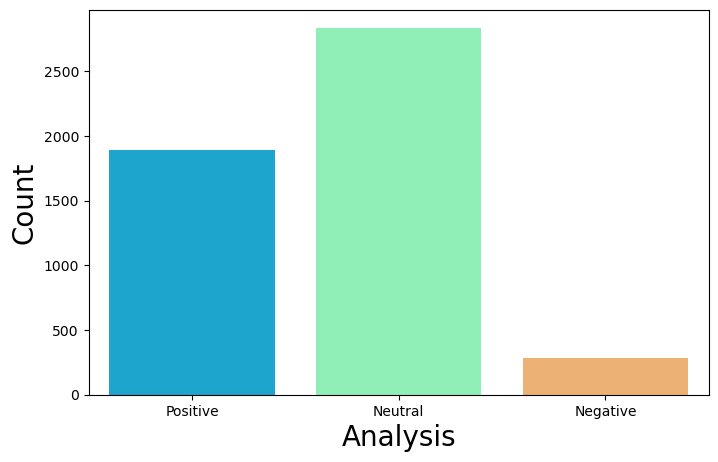

In [30]:
import seaborn as sns
plt.figure(figsize = (8,5), facecolor = None)
sns.countplot(x='Analysis',data=data,palette='rainbow')
plt.ylabel('Count',fontsize=20)
plt.xlabel('Analysis',fontsize=20)

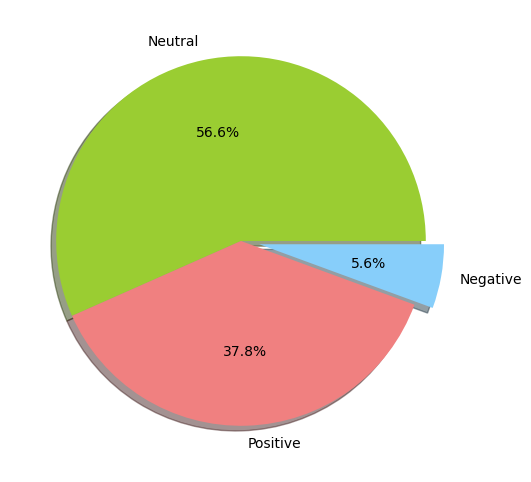

In [38]:
explode=(0,0,0.1)
labels=['Neutral','Positive','Negative']
colors=['yellowgreen','lightcoral','lightskyblue']
plt.figure(figsize = (8,6), facecolor = None)
plt.pie(data['Analysis'].value_counts(),explode=explode,colors=colors,labels=labels,autopct='%1.1f%%',shadow=True)
plt.show()

## Naive Bayes

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=32)

In [40]:
from sklearn.naive_bayes import MultinomialNB
model1=MultinomialNB()
model1.fit(X_train,y_train)

MultinomialNB()

In [41]:
pred1=model1.predict(X_test)

In [42]:
pred1

array(['Positive', 'Neutral', 'Positive', ..., 'Neutral', 'Neutral',
       'Neutral'], dtype='<U8')

In [43]:
from sklearn.metrics import accuracy_score,classification_report
acc1=accuracy_score(y_test,pred1)
print('Accuracy is:',acc1)
print('Classification Report is:',classification_report(y_test,pred1))

Accuracy is: 0.926
Classification Report is:               precision    recall  f1-score   support

    Negative       0.89      0.62      0.73        94
     Neutral       0.97      0.94      0.95       856
    Positive       0.87      0.96      0.91       550

    accuracy                           0.93      1500
   macro avg       0.91      0.84      0.87      1500
weighted avg       0.93      0.93      0.92      1500



## SVM

In [44]:
from sklearn.svm import SVC
model2=SVC(kernel='rbf')
model2.fit(X_train,y_train)

SVC()

In [45]:
pred2=model2.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score,classification_report
acc2=accuracy_score(y_test,pred2)
print('Accuracy is:',acc2)
print('Classification report is:',classification_report(y_test,pred2))

Accuracy is: 0.9386666666666666
Classification report is:               precision    recall  f1-score   support

    Negative       1.00      0.63      0.77        94
     Neutral       0.97      0.95      0.96       856
    Positive       0.88      0.97      0.92       550

    accuracy                           0.94      1500
   macro avg       0.95      0.85      0.89      1500
weighted avg       0.94      0.94      0.94      1500



## KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_range=range(1,100)
score={}
score_list=[]
for i in k_range:
    
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  score[i]=accuracy_score(y_test,y_pred)
  score_list.append(score[i])

In [48]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier(n_neighbors=1)
model3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [49]:
pred3=model3.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score,classification_report
acc3=accuracy_score(y_test,pred3)
print('Accuracy is:',acc3)
print('Classification Report is:',classification_report(y_test,pred3))

Accuracy is: 0.9366666666666666
Classification Report is:               precision    recall  f1-score   support

    Negative       0.80      0.67      0.73        94
     Neutral       0.96      0.96      0.96       856
    Positive       0.93      0.94      0.93       550

    accuracy                           0.94      1500
   macro avg       0.89      0.86      0.87      1500
weighted avg       0.94      0.94      0.94      1500



## Comparison chart

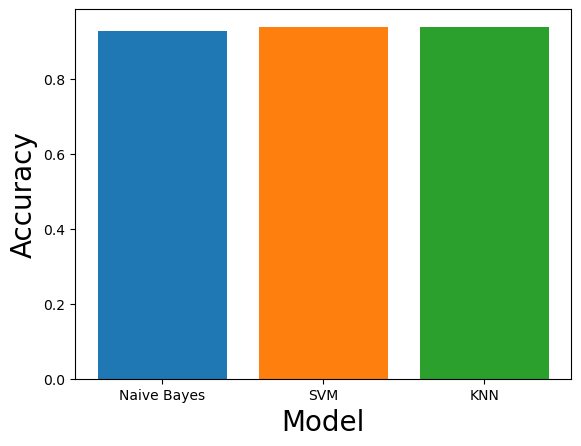

In [51]:
plt.bar('Naive Bayes',acc1)
plt.bar('SVM',acc2)
plt.bar('KNN',acc3)
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Model',fontsize=20)
plt.show()

## Further visualizations...

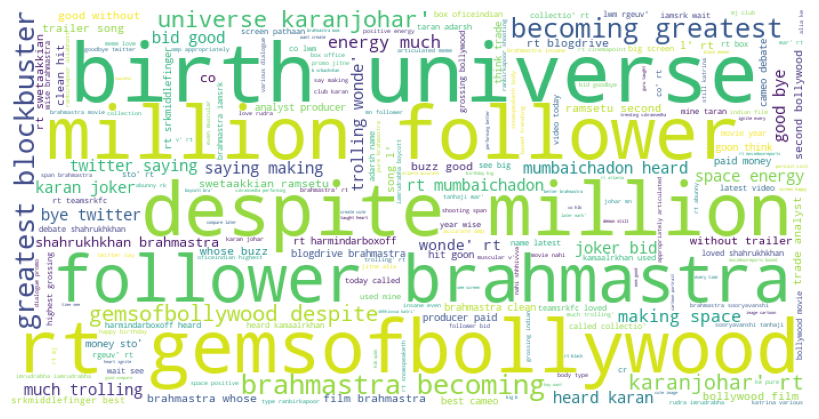

In [52]:
# WORDCLOUD of POSITIVE TWEETS
from wordcloud import WordCloud,STOPWORDS
stopwords=STOPWORDS
wc = WordCloud(width = 700, height = 350, background_color ='white', stopwords = stopwords) 
wc.generate(str(positive))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

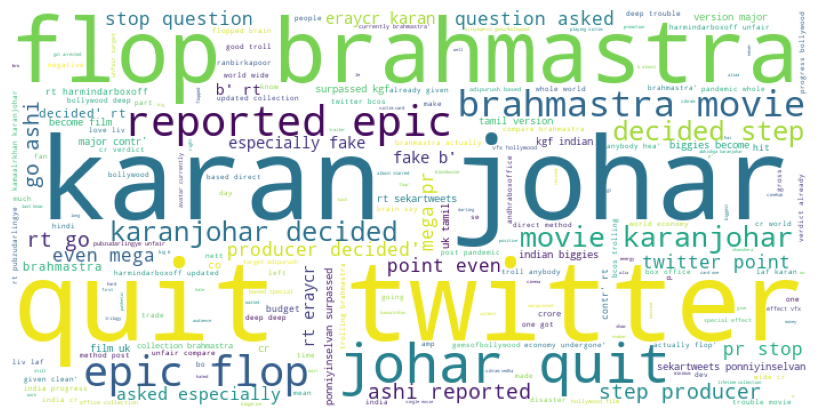

In [55]:
# WORDCLOUD of NEGATIVE TWEETS
from wordcloud import WordCloud,STOPWORDS
stopwords=STOPWORDS
wordcloud=WordCloud(width=700,height=350,background_color='white',stopwords=stopwords)
wordcloud.generate(str(negative))
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

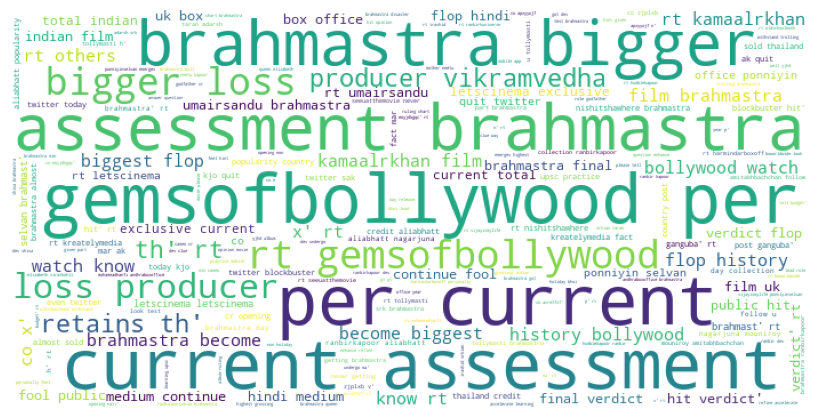

In [56]:
# NWORDCLOUD of NEUTRAL TWEETS
from wordcloud import WordCloud,STOPWORDS
stopwords=STOPWORDS
wordcloud=WordCloud(width=700,height=350,background_color='white',stopwords=stopwords)
wordcloud.generate(str(neutral))
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()